<a href="https://colab.research.google.com/github/MihaNiZZm/physics_2nd_sem/blob/master/potential_pit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# РЕШАЕМ ЗАДАЧКУ С ПОТЕНЦИАЛЬНОЙ ЯМОЙ КОНЕЧНОЙ ГЛУБИНЫЫЫЫЫЫ!!!! OMG!!!

Сначала дорешаем уравнение из пдфки. Но добрые люди уже сделали это за нас, поэтому просто вставлю сюда скрины из sem_quant2.pdf

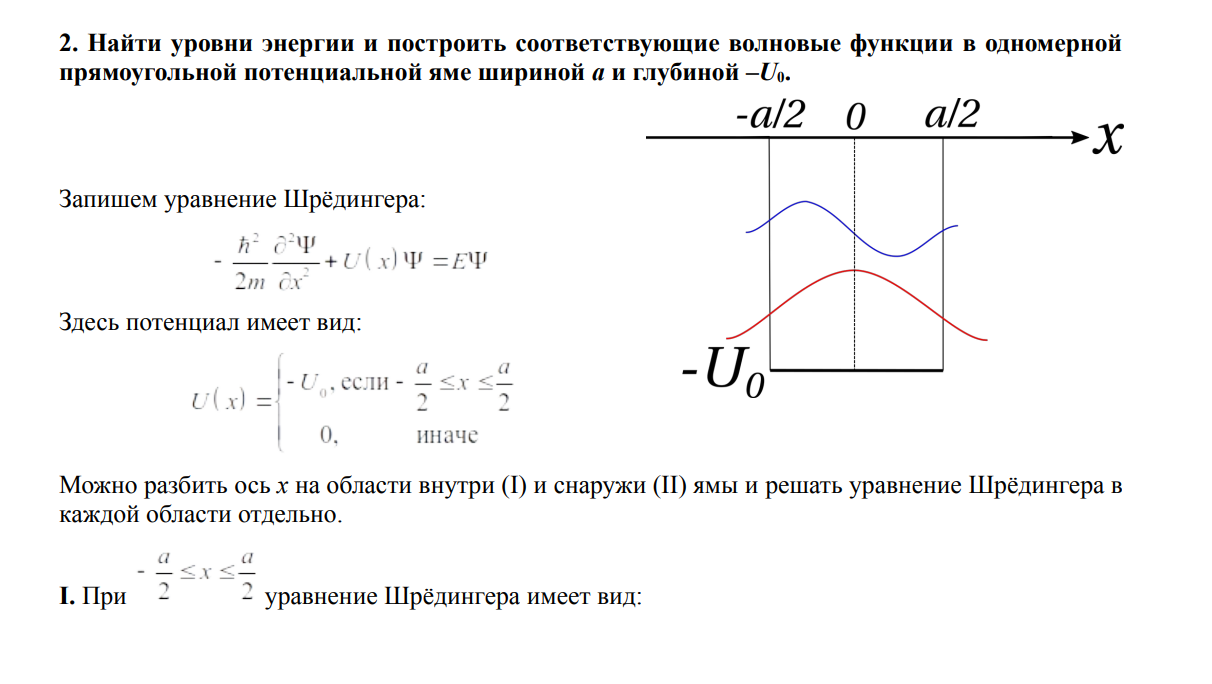

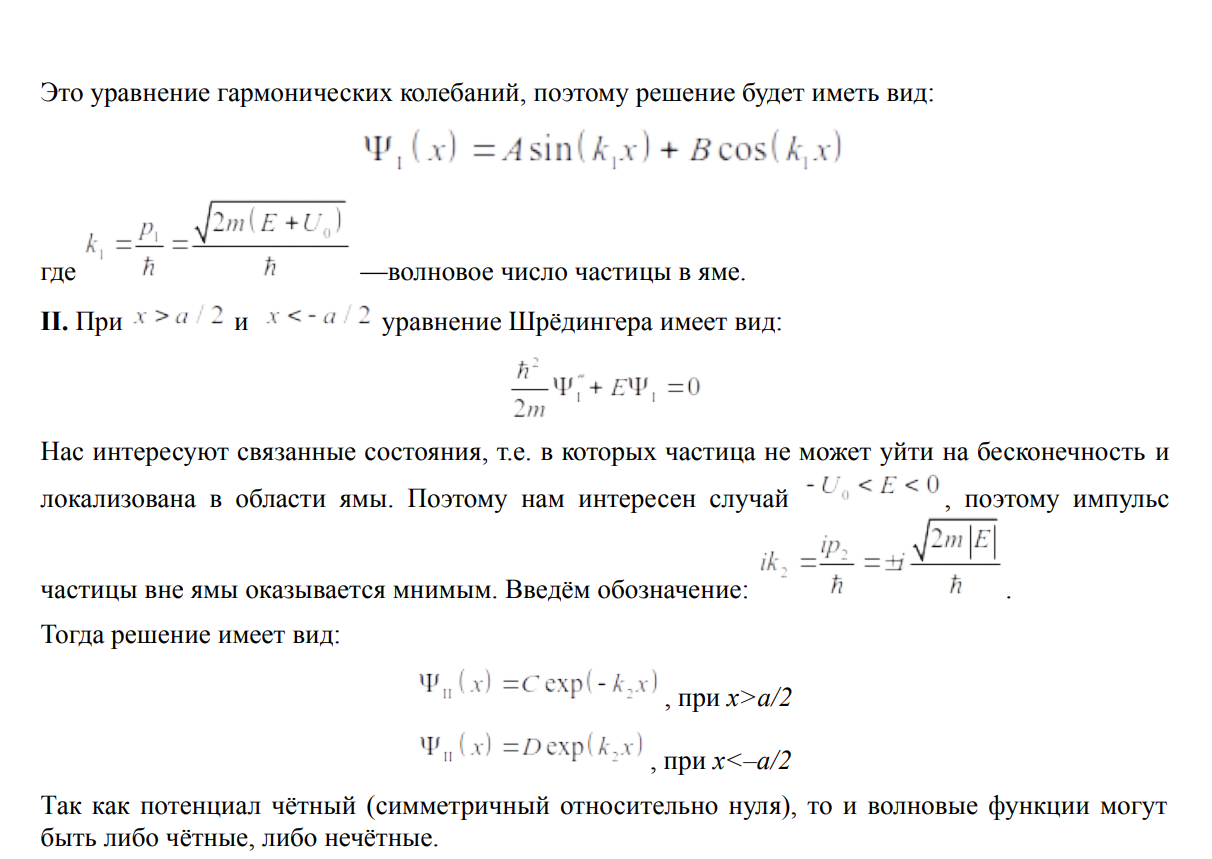

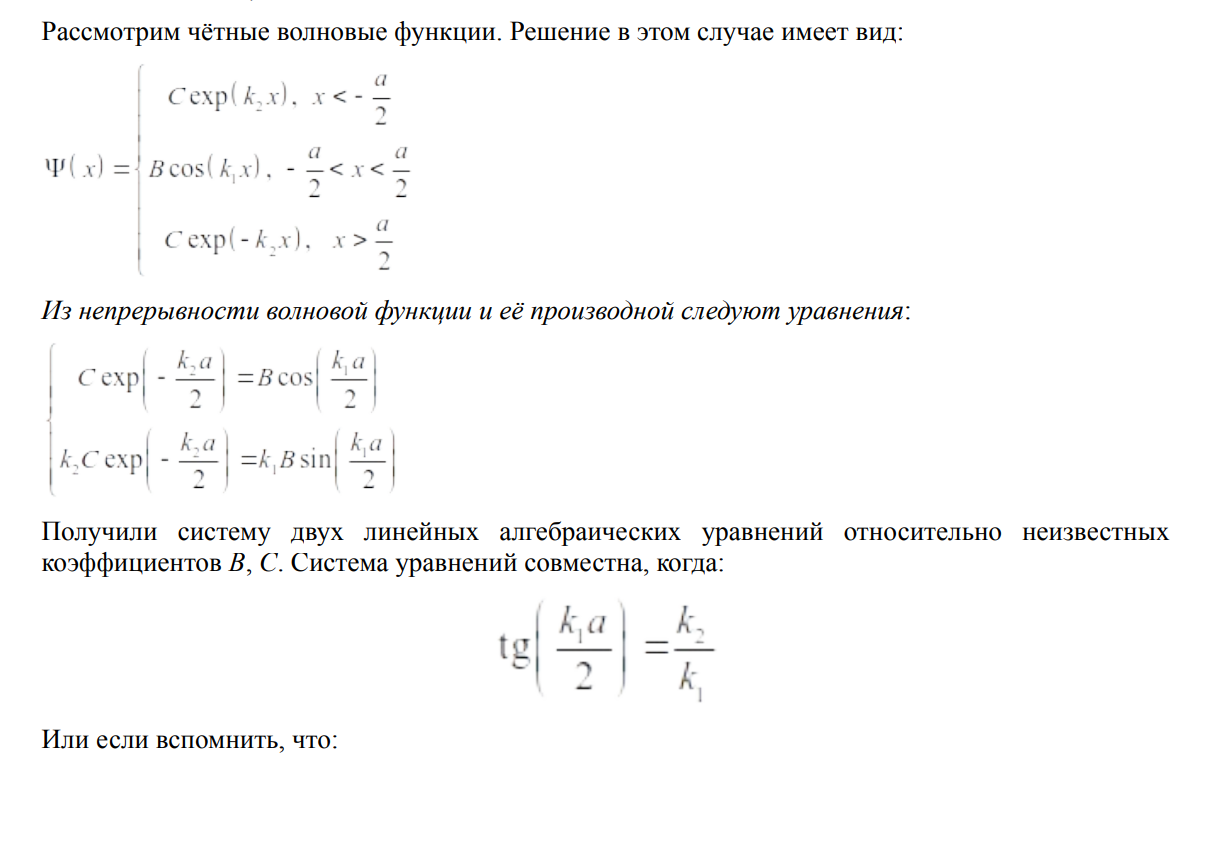

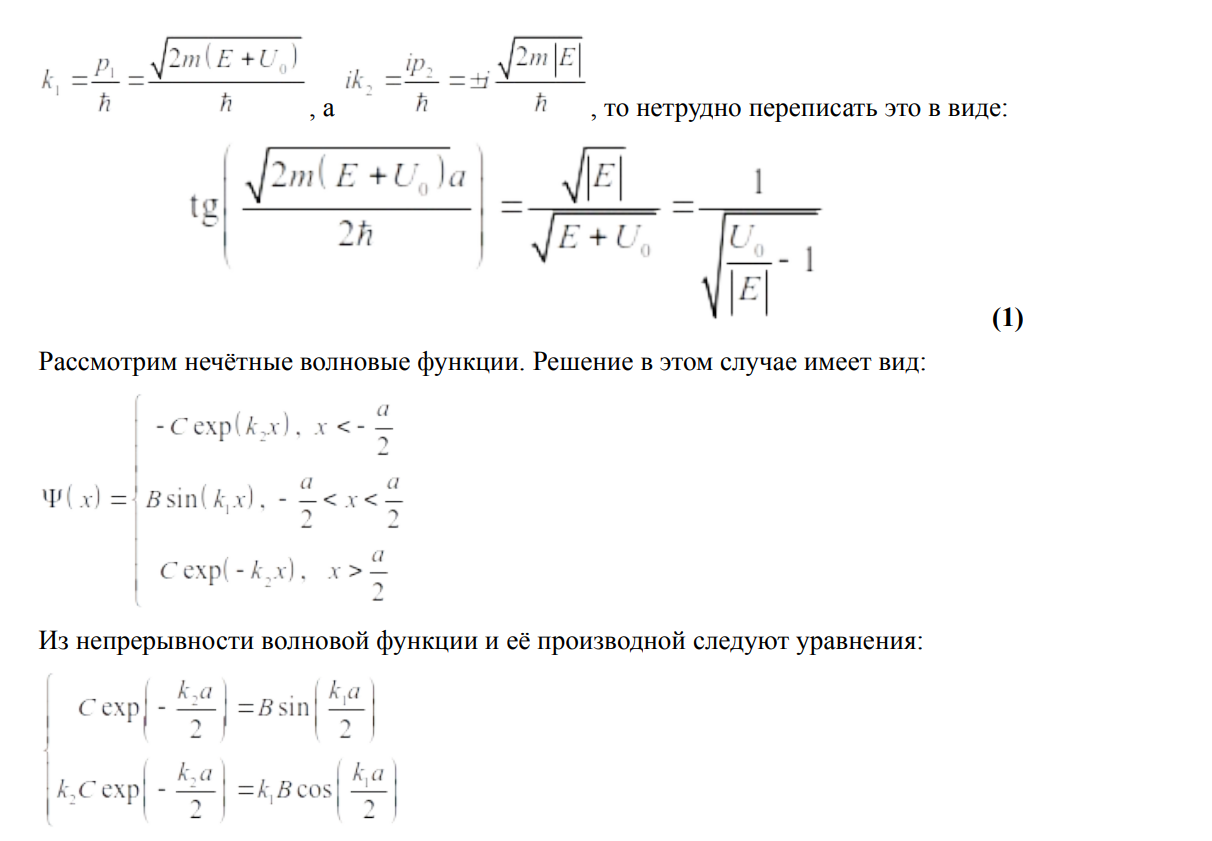

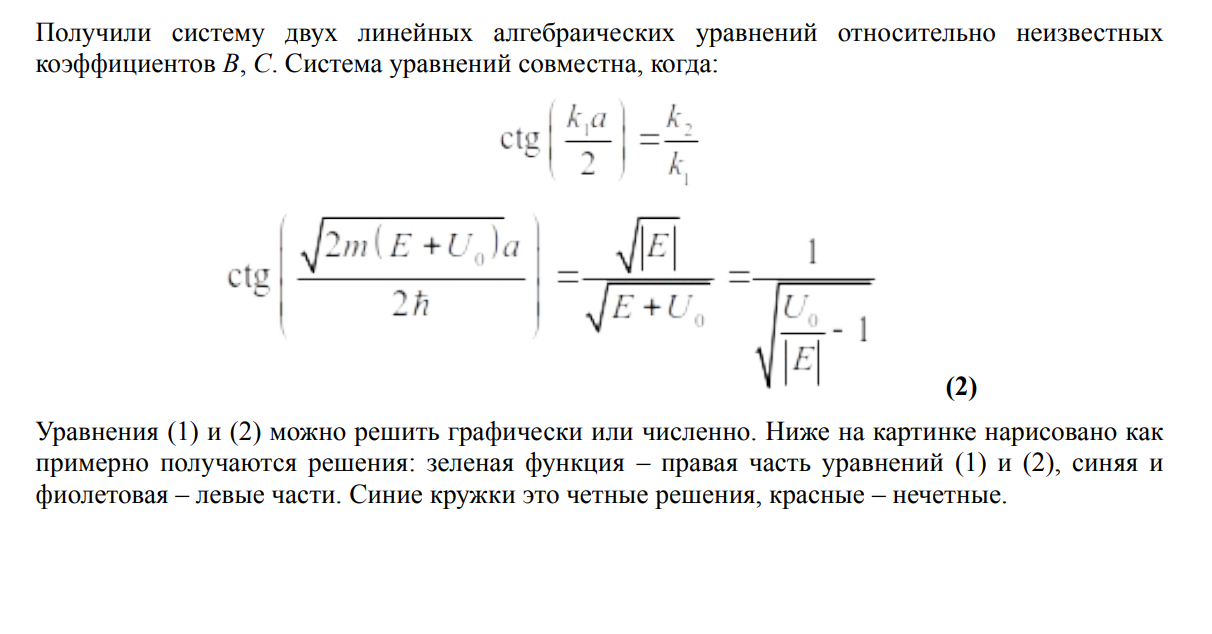

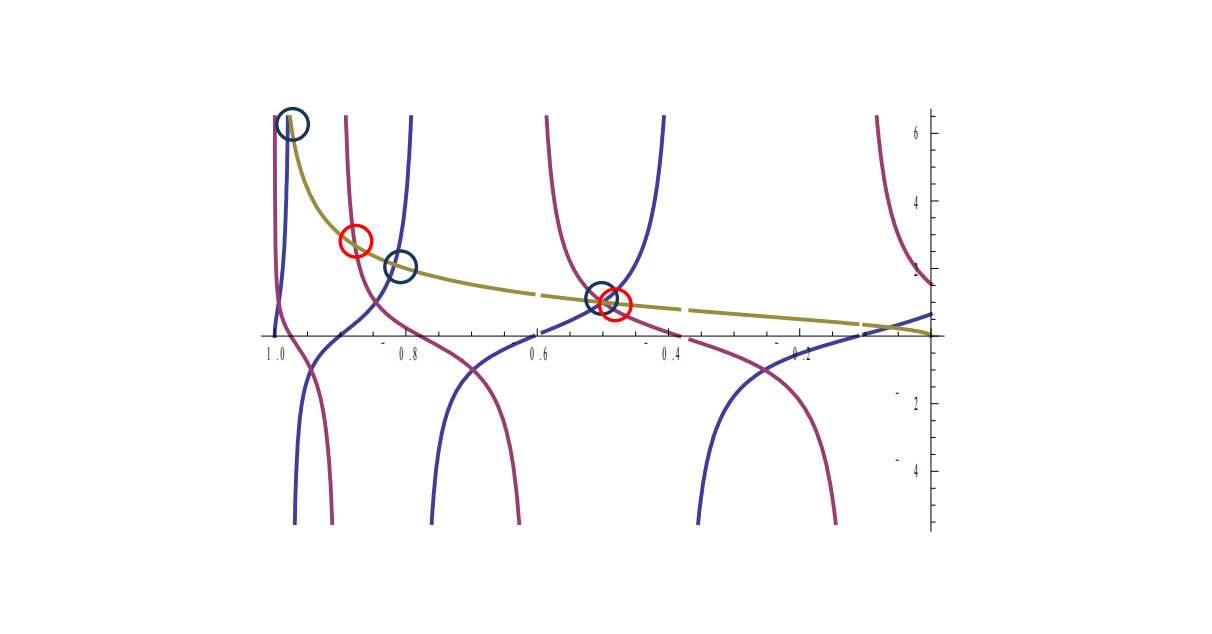

In [ ]:
# Импортим все необходимое
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as p

In [ ]:
a = 14
m = u = h = 1

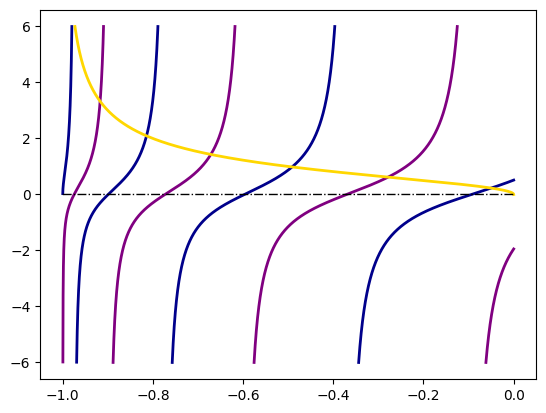

In [ ]:
x = p.linspace(-u + 0.00001, 0, 100000)
tg = (p.sin(a * (2 * m * (x + u))**(1/2) / (2 * h))) / (p.cos(a * (2 * m * (x + u))**(1/2) / (2 * h))) # Решение для четного случая
ctg = -1 / tg # Решение для нечетного случая
right = (abs(x) / (u + x))**(1/2) # Правая часть в уравнении
const_zero_func = [0 for i in x]

threshold = 6 # Ограничиваем сверху и снизу, чтобы видеть красивую картинку
tg[np.abs(tg) > threshold] = np.nan
ctg[np.abs(ctg) > threshold] = np.nan
right[np.abs(right) > threshold] = np.nan


plt.plot(x, tg, 'darkblue', lw=2)
plt.plot(x, ctg, 'purple', lw=2)
plt.plot(x, right, 'gold', lw=2)
plt.plot(x, const_zero_func, 'black', lw=1, linestyle = '-.')
plt.show()

# Теперь найдем решения в числах.

In [ ]:
def tg_func(x):
    return np.tan((np.sqrt(2 * m * (x + u)) * a) / (2*h))

def ctg_func(x):
    return -1 / tg_func(x)

def right_side_func(x):
    return (abs(x) / (u + x))**(1/2)

x_values = np.linspace(-1 + 0.0000001, 0, 10000)
tg_values = tg_func(x_values)
ctg_values = ctg_func(x_values)
right_values = right_side_func(x_values)

In [ ]:
def bisect(f, cur, epsilon=1e-6, max_iterations=100):
    a, b = cur[0], cur[-1]

    for iteration in range(max_iterations):
        c = (a + b) / 2
        if abs(f(c)) < epsilon or f(c) == 0:
            return c  # Found the root within the desired tolerance

        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

    return None

In [ ]:
e = np.linspace(-u + 0.0001, 0, 10000)
parts = 1000
e_parts = np.array_split(e, parts)
solutions_tg = []

for cur in e_parts:
  tg_bisect = lambda x: right_side_func(x) - tg_func(x)
  if tg_bisect(cur[0]) * tg_bisect(cur[-1]) >= 0:
    continue
  else:
    root = bisect(tg_bisect, cur)
    if(root):
      solutions_tg.append(root)

solutions_tg

[-0.9792437557220459,
 -0.814230712890625,
 -0.4913949584960937,
 -0.04980244140624994]

In [ ]:
partion = 1000
E = np.linspace(-u + 0.0001, 0, 10000)

def function1(x):
    return -1/ (np.tan((np.sqrt(2 * m * (x + u)) * a) / (2 * h)))

def function2(x):
    return 1 / (np.sqrt((u / np.abs(x)) - 1))

E_partitions = np.array_split(E, partion)
solutions_ctg = []
for cur in E_partitions:
  ctg_bisect = lambda x: function1(x) - function2(x)
  if ctg_bisect(cur[0]) * ctg_bisect(cur[-1]) >= 0:
    continue
  else:
    root = bisect(ctg_bisect, cur)
    if(root):
      solutions_ctg.append(root)
solutions_ctg

<ipython-input-104-968f6301aa72>:8: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / (np.sqrt((u / np.abs(x)) - 1))


[-0.9171401718139649, -0.6716078186035157, -0.2783324462890625]

# Графики энергетических уровней

In [ ]:
def draw_pit():
  x1 = np.linspace(-a, -a / 2, 10000)
  y1 = [0 for i in x1]

  x2 = np.linspace(a/2, a, 10000)
  y2 = [0 for i in x2]

  y3 = np.linspace(-u, 0, 10000)
  x3 = [-a / 2 for i in y3 ]

  x4 = [a / 2 for i in y3 ]

  x5 = np.linspace(-a/2, a / 2, 10000)
  y5 = [-u for i in x5]


  plt.plot(x1, y1, 'black', lw=1, linestyle='--')
  plt.plot(x2, y2, 'black', lw=1, linestyle='--')
  plt.plot(x3, y3, 'black', lw=1, linestyle='--')
  plt.plot(x4, y3, 'black', lw=1, linestyle='--')
  plt.plot(x5, y5, 'black', lw=1, linestyle='--')

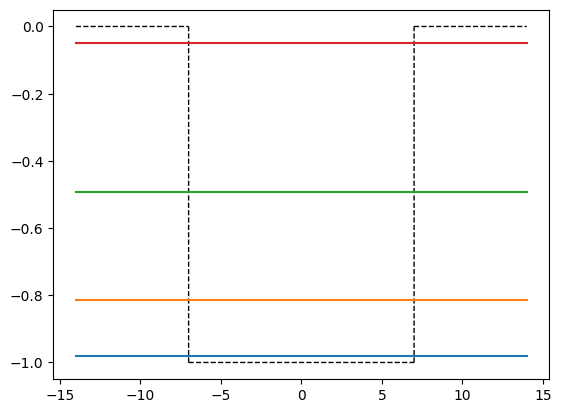

In [ ]:
draw_pit()

coord = np.linspace(-a, a, 1000)
for en in solutions_tg:
  energy_level = [en for i in coord]
  plt.plot(coord, energy_level) # Для тангенса

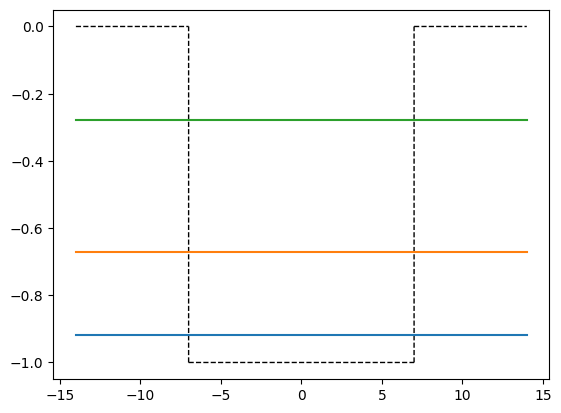

In [ ]:
draw_pit()

coord = np.linspace(-a, a, 1000)
for en in solutions_ctg:
  energy_level = [en for i in coord]
  plt.plot(coord, energy_level) # Для котангенса

# Теперь осталось только построить графики волновых функций

Для этого нам необходимо посчитать коэффициенты C и B. Уравнения должны удовлетворять условиям:
1. Волновая функция должна быть непрерывной
2. Производная волновой функции тоже должна быть непрерывна

А также вспомним, что квадрат модуля волновой функции является плотностью вероятности нахождения частицы в каком-либо месте в пространстве. Следовательно, это выражение должно быть нормировано. Получим систему уравнений из двух уравнений с двумя неизвестными и решим. Найдем В и С.



Учитывая эти условия мы можем составить систему уравнений для C и B для симметричного и несимметричного случаев.



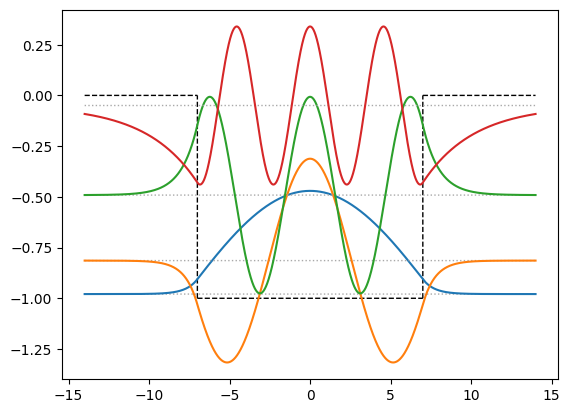

In [ ]:
draw_pit()
k1 = lambda x: math.sqrt(2 * m * (x + u) / h)
k2 = lambda x: math.sqrt(2 * m * abs(x) / h)

def B(en):
  first = (a * k1(en) + math.sin(a*k1(en))) / (2*k1(en))
  second = (math.cos((k1(en) * a) / 2)**2) / k2(en)
  return math.sqrt(1/(first/2 + second))


def C(en):
  return (B(en) * math.cos((k1(en) * a) / 2)) * math.exp((k2(en) * a) / 2)

def symm_f(x, en):
    if (x <= -a /2):
        return C(en) * (math.exp(k2(en) * x)) + en
    if (-a / 2 < x < a / 2):
        return B(en) * math.cos(k1(en) * x) + en
    if (x >= a / 2):
        return C(en) * math.exp(-k2(en) * x) + en


for en in solutions_tg:
  x = np.linspace(-a, a, 10000)
  wave_func = [symm_f(i, en) for i in x]
  energy_lvl = [en for _ in x]

  plt.plot(x, energy_lvl, color='darkgray', lw=1, linestyle=':')
  plt.plot(x, wave_func)


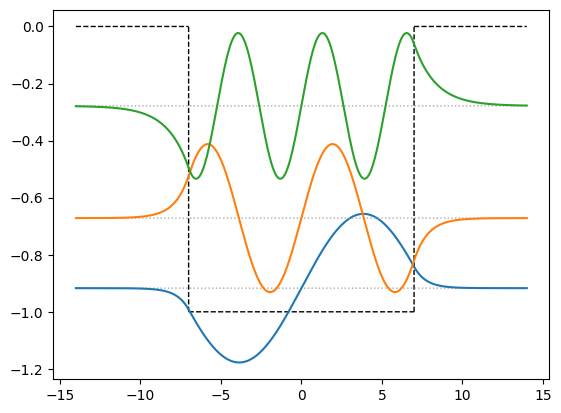

In [ ]:
draw_pit()

k1 = lambda x: math.sqrt(2 * m * (x + u) / h)
k2 = lambda x: math.sqrt(2 * m * abs(x) / h)

def C(en):
    return B(en) * math.sin(k1(en) * a / 2) * math.exp(k2(en) * a / 2)

def B(en):
    fst = math.sin(a * k1(en)) / k1(en)
    scnd = math.sin((k1(en) * a) / 2) ** 2 / k2(en)
    return math.sqrt(1 / (a - fst/2 + scnd))

def asymm_f(x, en):
    if x <= -a / 2:
        return -C(en) * math.exp(k2(en) * x) + en
    elif -a / 2 < x < a / 2:
        return B(en) * math.sin(k1(en) * x) + en
    elif x >= a / 2:
        return C(en) * math.exp(-k2(en) * x) + en

for en in solutions_ctg:
    x = np.linspace(-a, a, 10000)
    wave_func = [asymm_f(i, en) for i in x]
    energy_lvl = [en for i in x]
    plt.plot(x, energy_lvl, color='darkgray', lw=1, linestyle=':')
    plt.plot(x, wave_func)

plt.show()